# Sentiment Analysis using NLP Techniques

This notebook is created as a deliverable for the internship task:
- **Task**: Perform sentiment analysis on textual data using Natural Language Processing (NLP) techniques.
- **Dataset**: Sample movie reviews dataset
- **Model Type**: Classification (Sentiment: Positive or Negative)
- **Steps Covered**:
  - Data Preprocessing
  - Model Implementation
  - Insights & Evaluation

---


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [15]:
# Sample dataset of text reviews
data = {
    'review': [
        'I loved the movie, it was fantastic!',
        'Absolutely terrible, worst film ever.',
        'What a great performance by the actors.',
        'I did not like the plot, very boring.',
        'An excellent movie with a gripping story.',
        'Waste of time, do not recommend.',
        'Brilliant direction and superb acting.',
        'Poor screenplay and bad dialogues.'
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0]  # 1=Positive, 0=Negative
}

df = pd.DataFrame(data)
df.head()


,review,sentiment
0,"I loved the movie, it was fantastic!",1
1,"Absolutely terrible, worst film ever.",0
2,What a great performance by the actors.,1
3,"I did not like the plot, very boring.",0
4,An excellent movie with a gripping story.,1


In [17]:
# Text Vectorization using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review'])
y = df['sentiment']


In [19]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [21]:
# Model Training using Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



C:\Users\suran\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


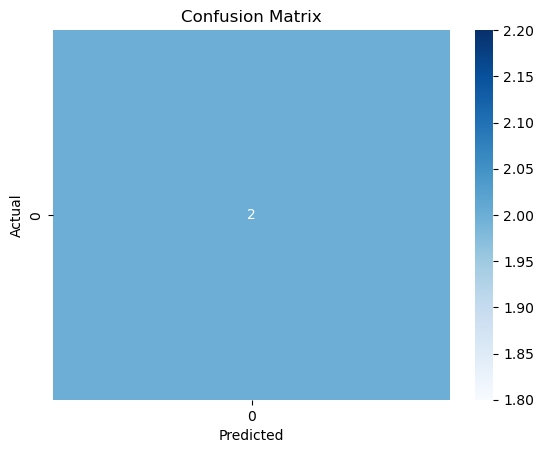

In [23]:
# Predicting on test data
y_pred = model.predict(X_test)

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
